# matplotlib Tutorial

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

## Introduction

Matplotlib is a library used to generate 2D and 3D plots and figures. It's a great library to add to your Jupyter arsenal, as it can create inline graphics (thanks to the line above) that make the notebook feel much more like a report.

Start off by importing the matplotlib module.

In [2]:
import matplotlib
import matplotlib.pyplot as plt

We'll also use numpy to generate some basic data, so import that module as well.

In [3]:
import numpy as np

## Basic plotting

Before we can plot our data, we need to have some data!

In [4]:
x = np.linspace(0, 5, 10)
y = x ** 2

The general flow of matplotlib plots is to create a figure or plot, add some data to it, and then configure what the plot looks like. The first step is to create a figure, which we'll call `fig`. Then we add some default axes to it and plot our data. This is the simplest form of a plot without any configuration.

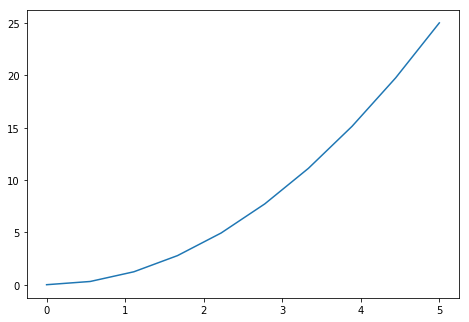

In [5]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])  # Plot size as [left, botth, width, height] as a fraction from 0 to 1
axes.plot(x, y);

Axes labels and graph titles tend to be quite useful, so we'll add those with a few simple methods.

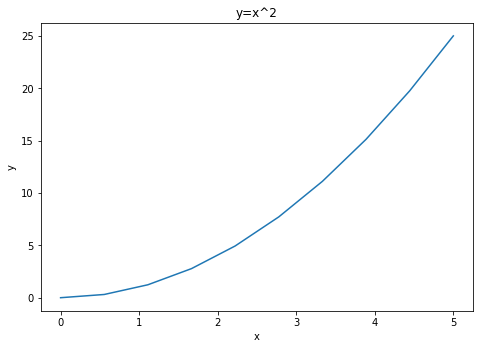

In [6]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y);
axes.set_xlabel('x');
axes.set_ylabel('y');
axes.set_title('y=x^2');

Now we're getting a little closer to a presentable end product, but there are still a few things to fix. First off, let's make the font size bigger. We can also change the font face. A good font for printed pubications is STIX. The default font face works well if the figure is just going to be used in a notebook. The `update` method accepts a dictionary of changes to make. `font.size` is intuitive, but there is also a font family and a math font. The font family determines the characteristics of the font, such as whether it has serifs or not. The math font is useful when using $\LaTeX$ formatted text, as shown in the next section.

In [7]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Now when we plot the graph, it's much more legibile.

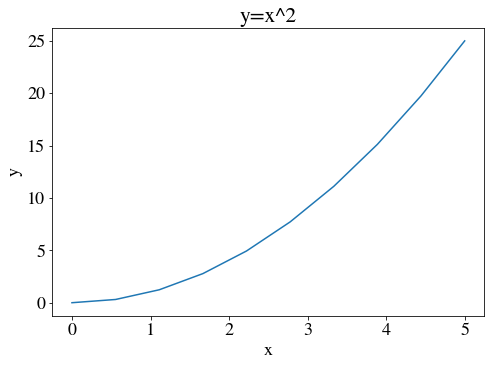

In [8]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y);
axes.set_xlabel('x');
axes.set_ylabel('y');
axes.set_title('y=x^2');

Another helpful feature of matplotlib is that it allows for $\LaTeX$ formatting. $\LaTeX$ is a programmatic markup language, similar in nature to HTML, that is used for many publications. In the context of mathplotlib, simple $\LaTeX$ can be used in place of labels, titles, and other text. We can use $\LaTeX$ to format our title better. We indicate we want to use $\LaTeX$ formatting by surrounding the string with \$ signs.

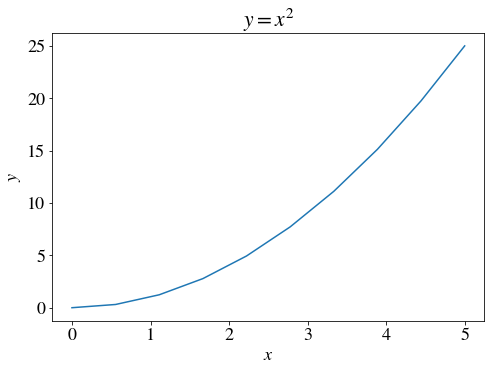

In [9]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y);
axes.set_xlabel(r'$x$');  # the r prefix to the string indicates that Python shouldn't do any formatting on this string
                          # e.g. \n remains as the characters '\' and 'n' as opposed to turning into a newline character
axes.set_ylabel(r'$y$');
axes.set_title(r'$y=x^2$');

The last step is to add a legend. We can label curves and then call the `legend` method.

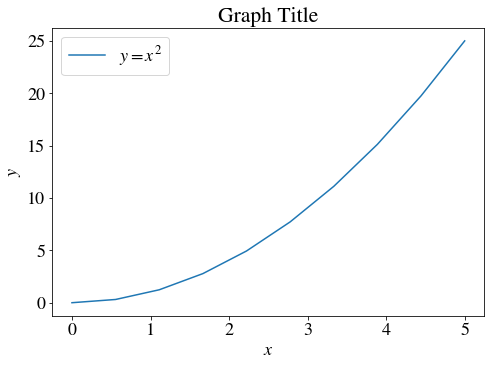

In [10]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y, label=r'$y=x^2$');
axes.set_xlabel(r'$x$');
axes.set_ylabel(r'$y$');
axes.set_title('Graph Title');
axes.legend();

## More complex plots

matplotlib aims to be used in publications and other professional work, so it provides a huge amount of customizability. Here we'll look at a very brief set of these features. We'll start off by producing four subplots.

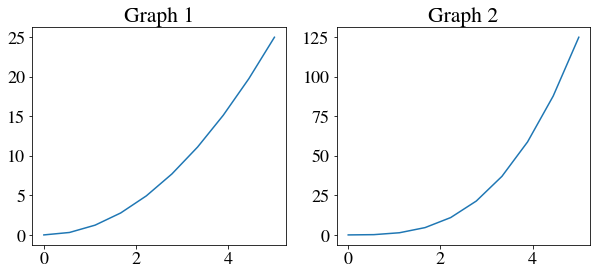

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))  # 2 rows and 1 column with a larger-than-default figure size
                                                             # to accomodate the two figures
axes[0].plot(x, x ** 2);
axes[0].set_title('Graph 1');

axes[1].plot(x, x ** 3);
axes[1].set_title('Graph 2');

We can also combine multiple plots into one figure.

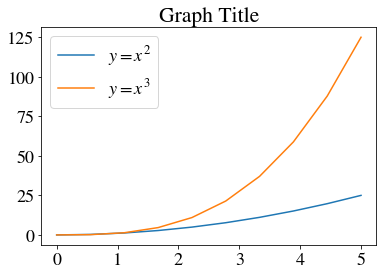

In [12]:
fig, axes = plt.subplots()  # default is to create a single set of axes
axes.plot(x, x ** 2, label=r'$y=x^2$');
axes.plot(x, x ** 3, label=r'$y=x^3$');
axes.set_title('Graph Title');
axes.legend();

It's also often helpful to change the axes limits and ticks to be more clear. This is made simple with matplotlib.

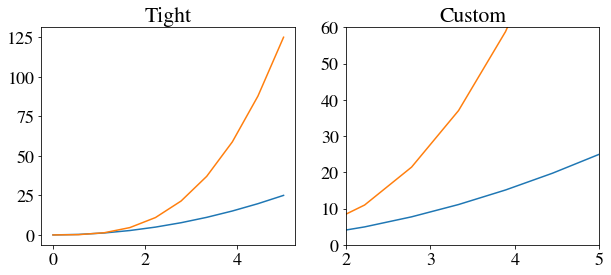

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(x, x ** 2);
axes[0].plot(x, x ** 3);
axes[0].axis('tight');
axes[0].set_title('Tight');

axes[1].plot(x, x ** 2);
axes[1].plot(x, x ** 3);
axes[1].set_ylim([0, 60]);
axes[1].set_xlim([2, 5]);
axes[1].set_title('Custom');

Additionally, axes ticks and labels can be specified explicitly.

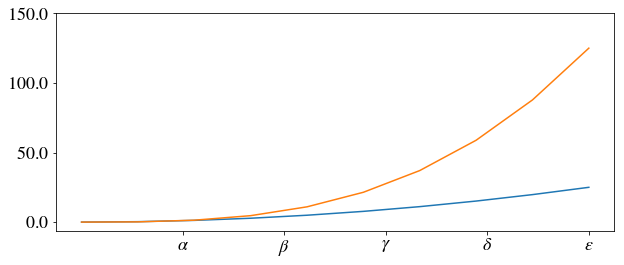

In [14]:
fig, axes = plt.subplots(figsize=(10, 4))

axes.plot(x, x ** 2);
axes.plot(x, x ** 3);

axes.set_xticks([1, 2, 3, 4, 5]);
axes.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$']);

yticks = [0, 50, 100, 150]
axes.set_yticks(yticks);
axes.set_yticklabels(["${:.1f}$".format(y) for y in yticks]);

matplotlib allows allows for heavy customization of the lines. `color` can be used to indicate which color a line should be, and it even allows for HTML color codes (i.e. there are 16 million colors at your disposal). There are also parameters, `linestyle` (or `ls`) and `linewidth` (or `lw`), which allow you to change the style and thickness of the lines, respectively.

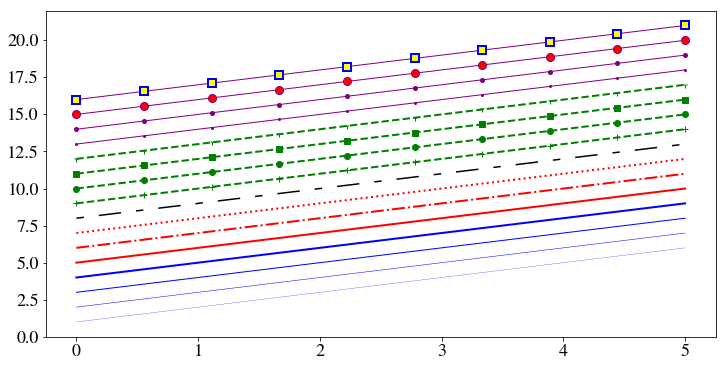

In [15]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x+1, color="blue", linewidth=0.25)
axes.plot(x, x+2, color="blue", linewidth=0.50)
axes.plot(x, x+3, color="blue", linewidth=1.00)
axes.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
axes.plot(x, x+5, color="red", lw=2, linestyle='-')
axes.plot(x, x+6, color="red", lw=2, ls='-.')
axes.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = axes.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10])  # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
axes.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
axes.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
axes.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
axes.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
axes.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
axes.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
axes.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
axes.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
          markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

## Other types of figures

Disclaimer: I pulled these straight from J. R. Johansson's tutorial and haven't played around with any of them very much.

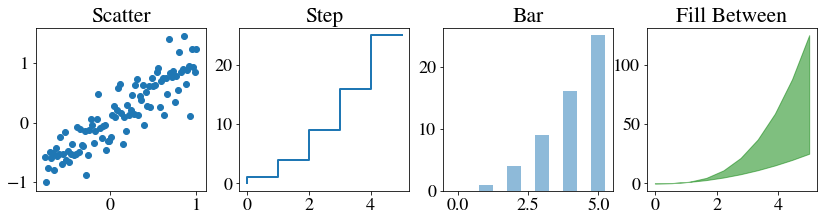

In [16]:
xx = np.linspace(-0.75, 1., 100)
n = np.array([0, 1, 2, 3, 4, 5])
fig, axes = plt.subplots(1, 4, figsize=(14,3))

axes[0].scatter(xx, xx + 0.25 * np.random.randn(len(xx)))
axes[0].set_title('Scatter')

axes[1].step(n, n ** 2, lw=2)
axes[1].set_title('Step')

axes[2].bar(n, n ** 2, align="center", width=0.5, alpha=0.5)
axes[2].set_title('Bar')

axes[3].fill_between(x, x ** 2, x ** 3, color="green", alpha=0.5);
axes[3].set_title('Fill Between');

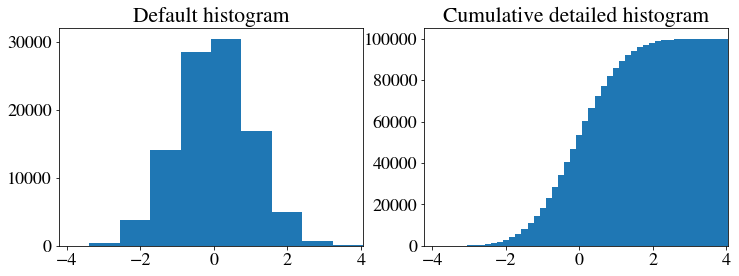

In [17]:
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title('Default histogram')
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title('Cumulative detailed histogram')
axes[1].set_xlim((min(n), max(n)));

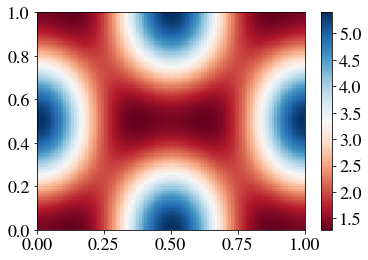

In [18]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

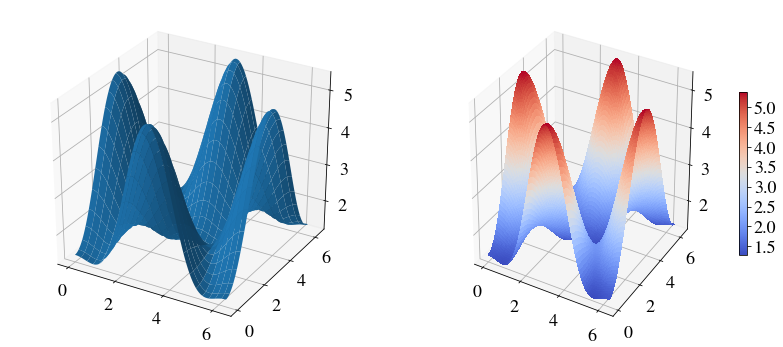

In [19]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
axes = fig.add_subplot(1, 2, 1, projection='3d')

p = axes.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
axes = fig.add_subplot(1, 2, 2, projection='3d')
p = axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

## References

* [J. R. Johansson's matplotlib tutorial](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)
* [matplotlib documentation](https://matplotlib.org/api/index.html)
* [$\LaTeX$ tutorial](https://www.latex-tutorial.com/tutorials/)